In [175]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

In [176]:
data = pd.read_csv("standardized.csv")
data = data.dropna(subset=["production_countries", "weighted_average_popularity"])
country_dict = {}

country_data = pd.DataFrame(columns = ['country', 'popularity'])

# iterate over the rows to find the all popularity for each country 
for index, row in data.iterrows():
    countries = row["production_countries"]
    popularity = row["weighted_average_popularity"]
    countries = ast.literal_eval(countries)
    
    for i in range(len(countries)):
        country = countries[i]
        if country not in country_dict:
            country_dict[country] = [popularity]
        else:
            country_dict[country].append(popularity)

        country_data = pd.concat([country_data, pd.DataFrame({'country': [country], 'popularity': [popularity]})], ignore_index = True)
        i += 1

country_data.to_csv("country.csv", index = False)

In [177]:
data = pd.read_csv("country.csv")
data = data.dropna(subset = ["country", "popularity"])

# discreate the popularity
data["range"] = pd.cut(data["popularity"], bins=3, labels=['low', 'mediate', "high"])
countries = data[["country"]].copy()
popularity = data["range"]

# convert the type to category
countries["country"] = countries["country"].astype("category")

# calculate mutual information of discreate variables
mi = mutual_info_classif(X=countries, y=popularity, discrete_features=True)
print(mi)                                   


[0.12649839]


There is weak relationship between the number of movie that country release and the popularity of the movie

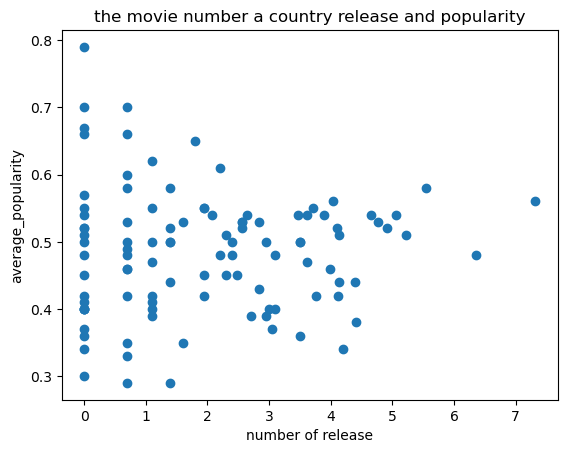

In [178]:
data2 = pd.DataFrame(columns = ['num', 'popularity'])

# calculate the average popularity and number of movie a country release
for country, popularity in country_dict.items():
    num = np.log(len(popularity))
    average = np.round(sum(popularity)/len(popularity),2)
    data2 = pd.concat([data2, pd.DataFrame({'num': [num], 'popularity': [average]})], ignore_index = True)
# plot the relationship between number of movies a country release and its popularity
plt.scatter(x = data2['num'], y = data2['popularity'])
plt.xlabel("number of release")
plt.ylabel("average_popularity")
plt.title("the movie number a country release and popularity")
plt.show()
data2.to_csv("data.csv")